  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b> Coronary Heart Disease (CHD) Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>

## *Problem Statement*:
The objective of the dataset is to Predict the 10 year risk of coronary heart disease (CHD)


## *Data Definition*:

Attribute Information:

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

**sex**: male or female

**age**: age of the patient

**currentSmoker**: whether or not the patient is a current smoker

**cigsPerDay**: the number of cigarettes that the person smoked on average in one day.

**BPMeds**: whether or not the patient was on blood pressure medication

**prevalentStroke**: whether or not the patient had previously had a stroke 

**prevalentHyp**: whether or not the patient was hypertensive 

**diabetes**: whether or not the patient had diabetes 

**totChol**: total cholesterol level 

**sysBP**: systolic blood pressure 

**diaBP**: diastolic blood pressure 

**BMI**: Body Mass Index 

**heartRate**: heart rate 

**glucose**: glucose level

**10 year risk of coronary heart disease CHD** (binary: “1”, means “Yes”, “0” means “No”) 

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score



# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# **Read Data**

In [2]:
df_CHD = pd.read_csv('framingham.csv')

In [3]:
df_CHD.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Exploratory Data Analysis**

In [4]:
df_CHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


*From the above output, we can see clearly that some variables are wrongly interpreted as numeric but according to the data variable information we have, these variables are categorical.*

In [5]:
# Gender - (1 = male; 0 = female)
df_CHD = df_CHD.rename(columns={'male': 'Gender'})

In [6]:
# use 'for' loop to change the data type of variables 
for col in ['Gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
    df_CHD[col] = df_CHD[col].astype('object')

In [7]:
# recheck the data types of all variables
df_CHD.dtypes

Gender              object
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [8]:
# Assuming, the field 'education' will not affect the 'Target Variable (TenYearCHD)'. So we drop this field as it will not usefull in our prediction model.
df_CHD.drop('education', axis=1, inplace=True)

In [9]:
#recheck the shape
df_CHD.shape

(4238, 15)

### *Summary Statistics*

In [10]:
# summary statistics for numeric variables
df_CHD.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5
BMI,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.040,56.8
heartRate,4237.0,75.878924,12.026596,44.00,68.00,75.0,83.000,143.0
glucose,3850.0,81.966753,23.959998,40.00,71.00,78.0,87.000,394.0
TenYearCHD,4238.0,0.151958,0.359023,0.00,0.00,0.0,0.000,1.0


In [11]:
# summary statistics for categorical variables
df_CHD.describe(include='object').T

,count,unique,top,freq
Gender,4238.0,2.0,0.0,2419.0
currentSmoker,4238.0,2.0,0.0,2144.0
BPMeds,4185.0,2.0,0.0,4061.0
prevalentStroke,4238.0,2.0,0.0,4213.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


### *Distribution of Numeric Independent Variables*

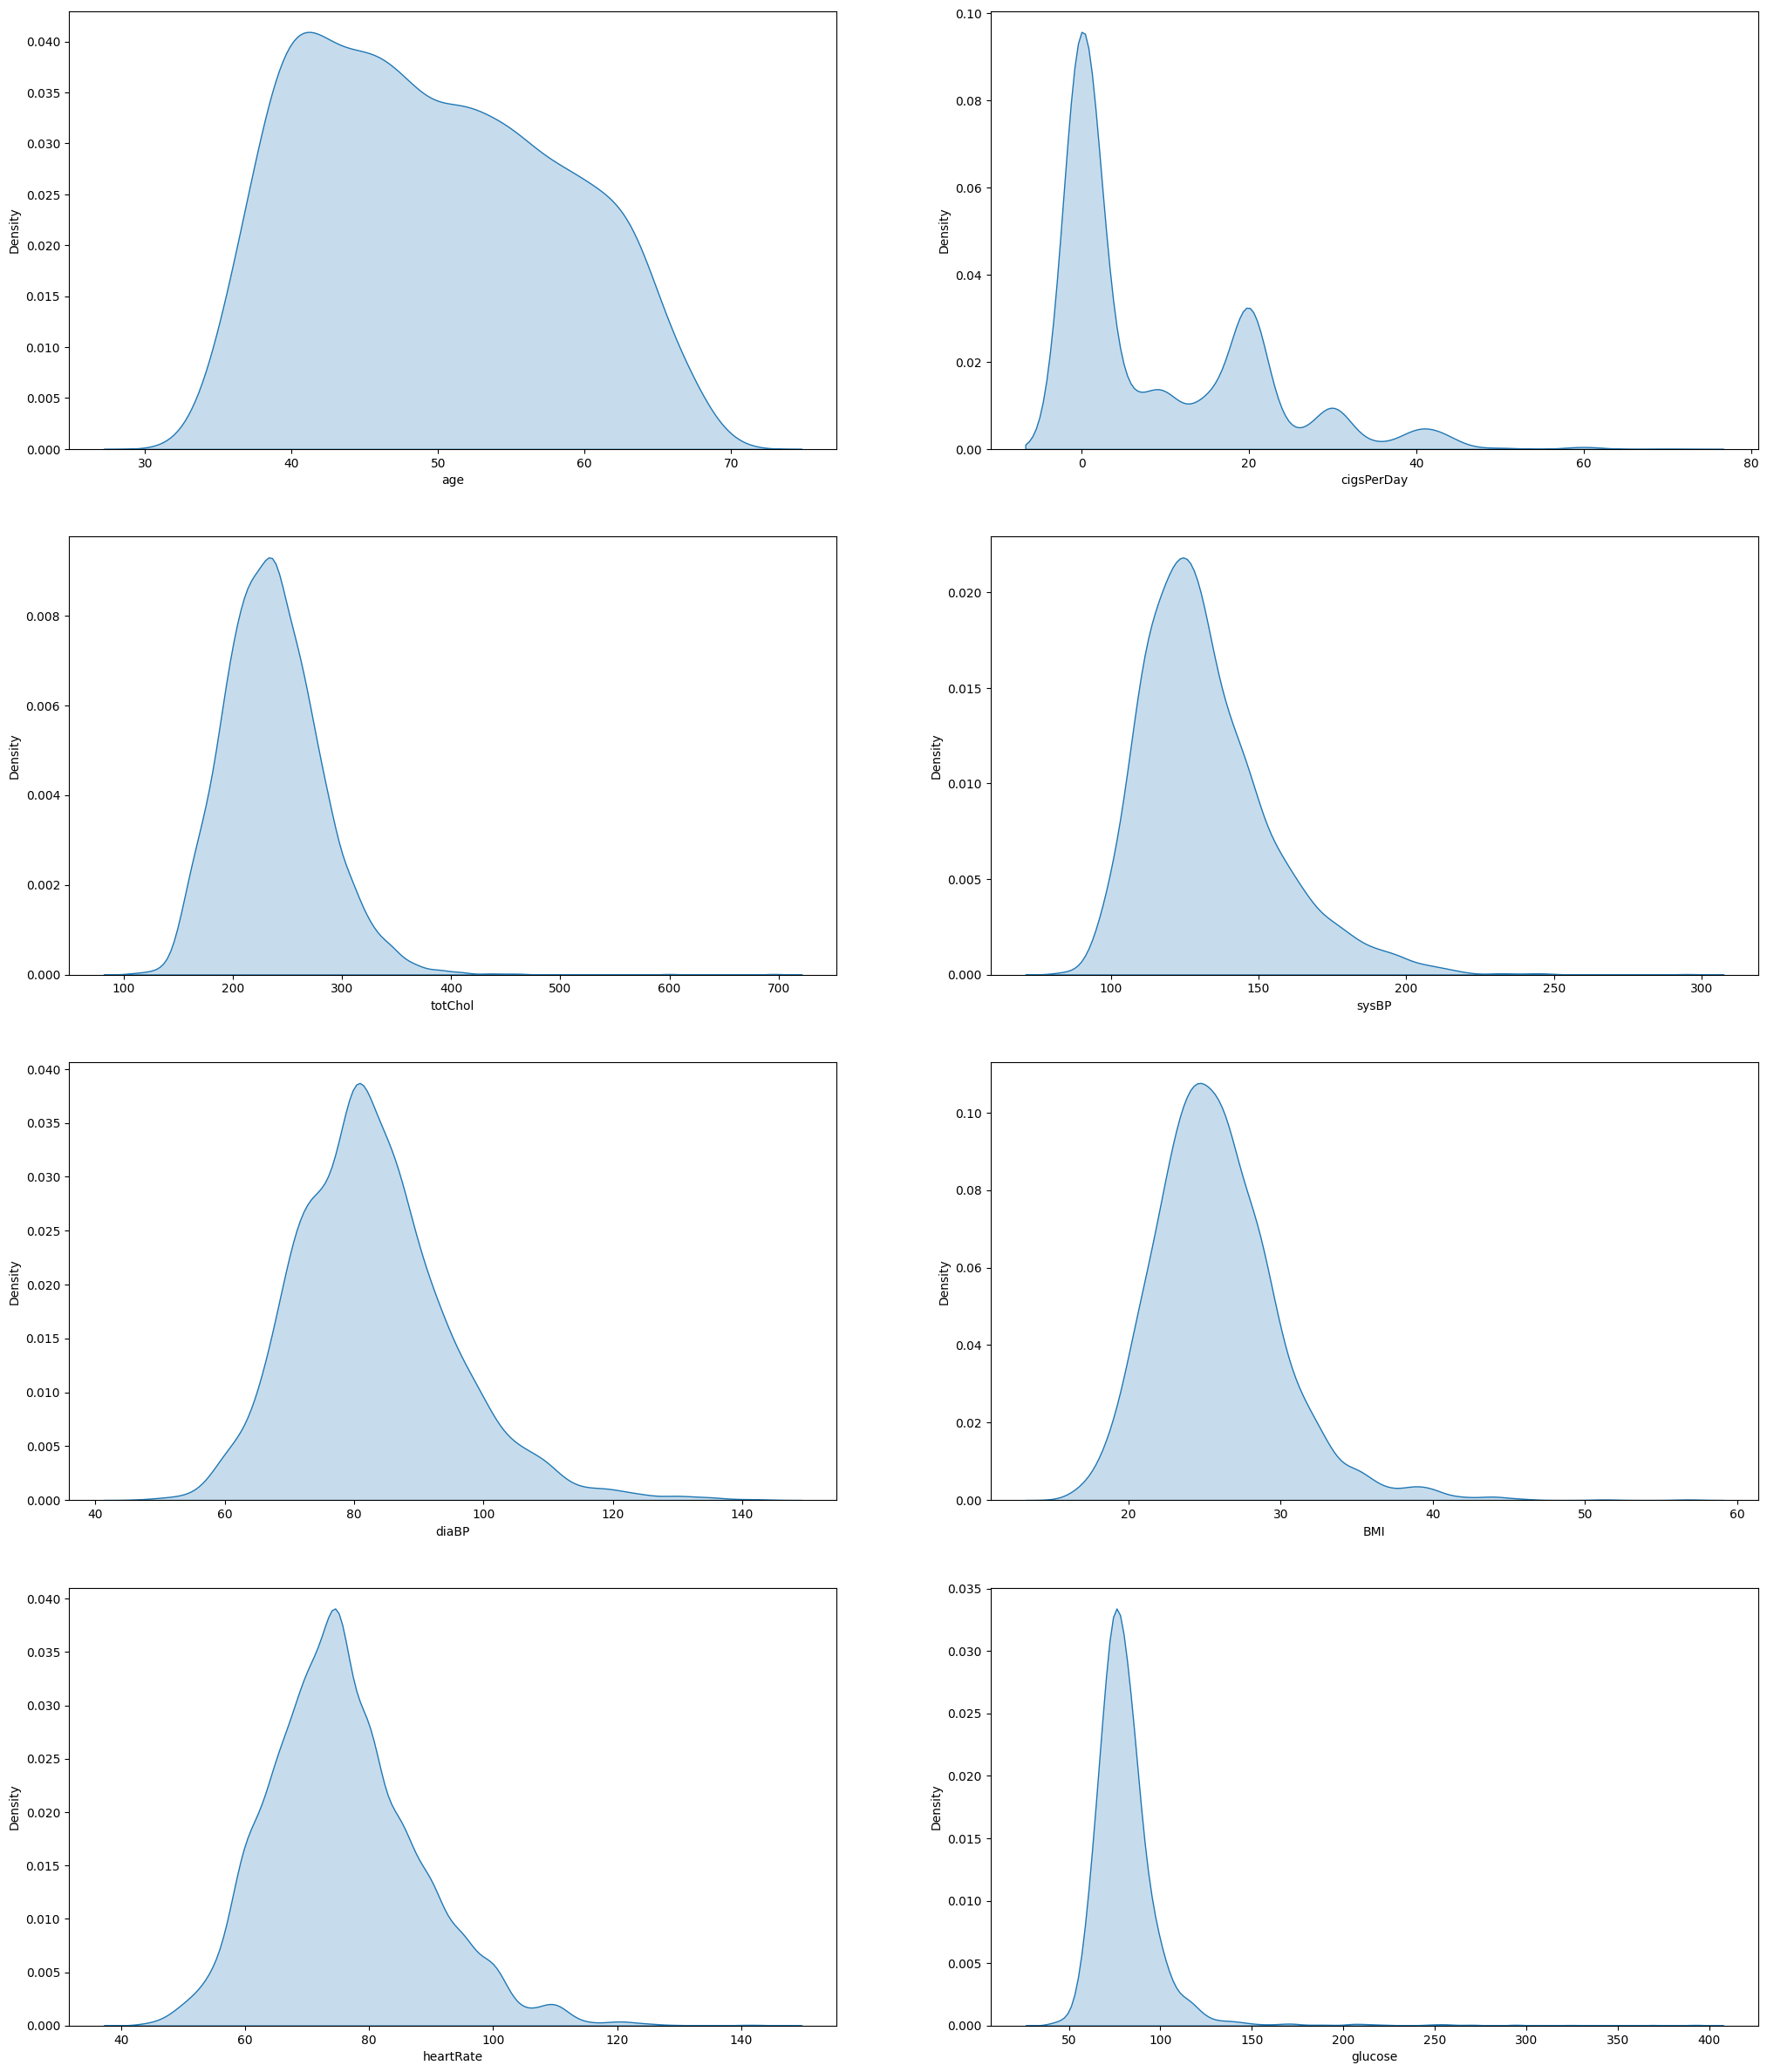

In [12]:
# Distribution of all continuous variables 

# all the continuous variables
df_CHD_num = df_CHD.select_dtypes(include='number')
df_CHD_num

# creating the required subplots
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(25, 30))

# use for loop to plot the distribution for each variable
for variable, subplot in zip(df_CHD_num, ax.flatten()):
    
    sns.kdeplot(df_CHD_num[variable], ax = subplot, shade = True)

# display the plot
plt.show()

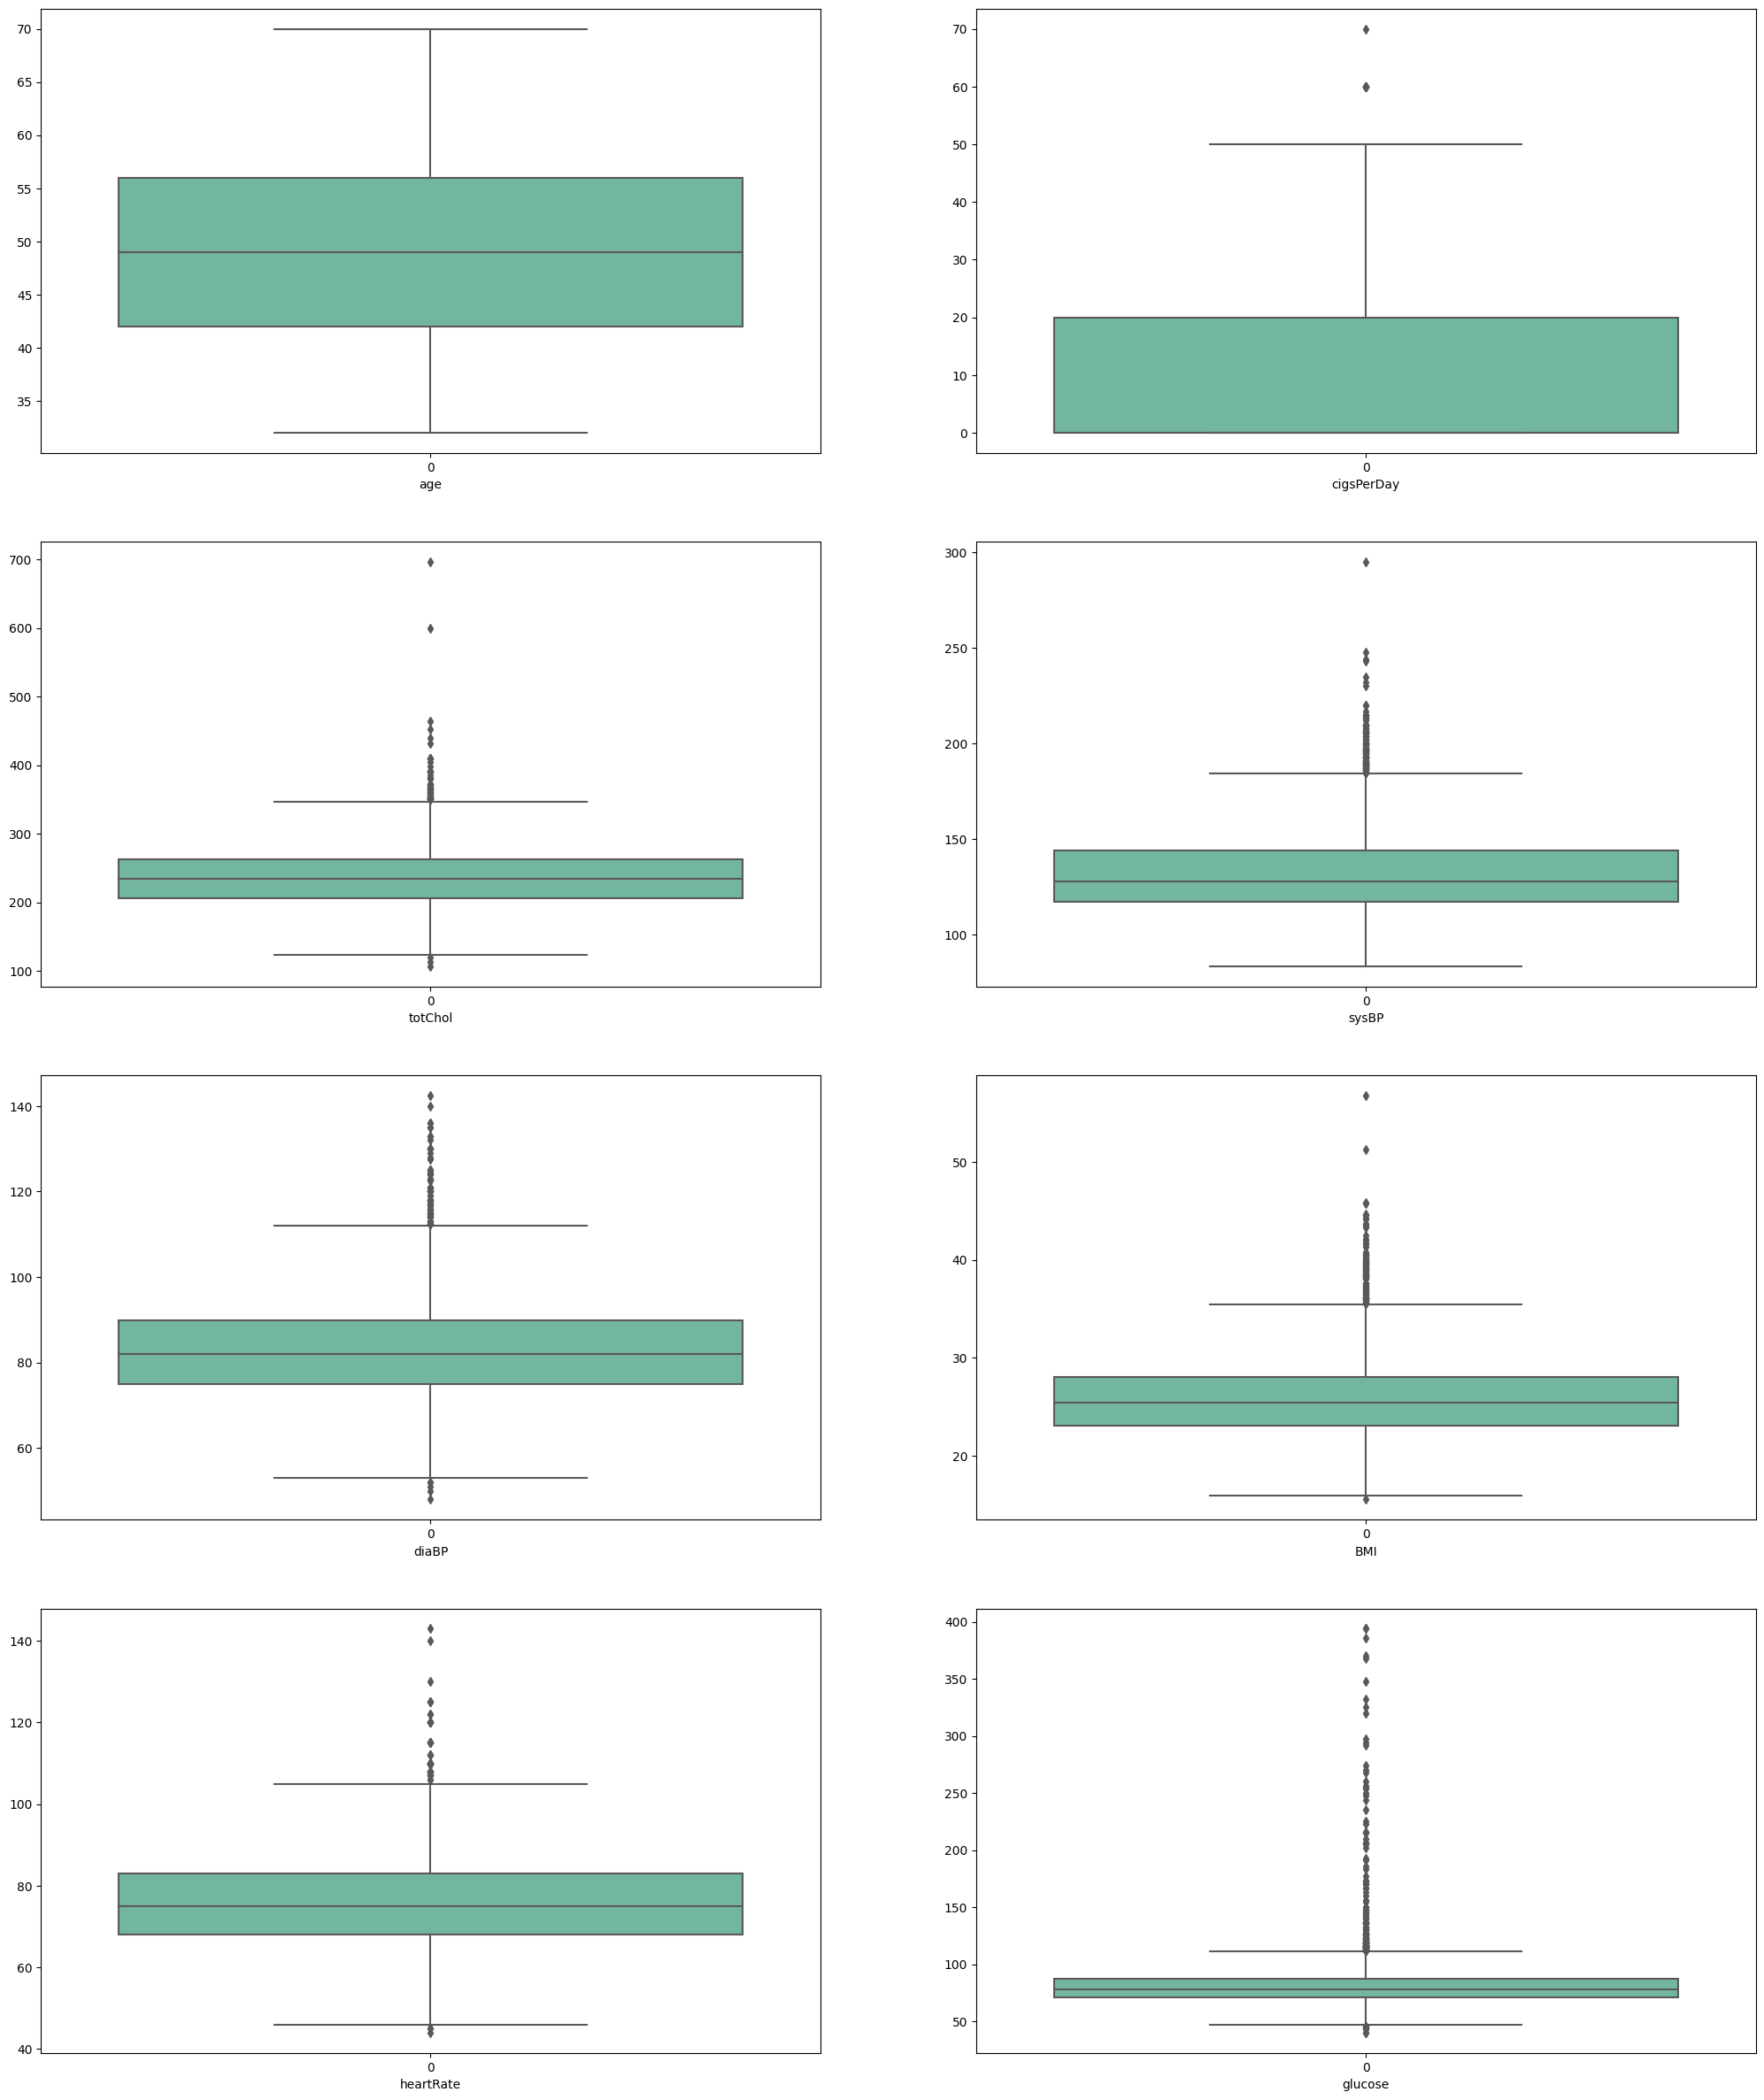

In [13]:
# creating the required subplots
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(25, 30))

# use 'for' loop to plot the boxplot for each variable
for variable, subplot in zip(df_CHD_num, ax.flatten()):
    
    sns.boxplot(df_CHD_num[variable], ax = subplot, palette='Set2')
    subplot.set_xlabel(variable)
    
# display the plot
plt.show()

In [14]:
#Outliers for 'cigsPerDay'

# calculate the interquartile range (IQR)
q1 = df_CHD['cigsPerDay'].quantile(0.25)
q3 = df_CHD['cigsPerDay'].quantile(0.75)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# remove outliers from the dataframe
df_CHD = df_CHD[(df_CHD['cigsPerDay'] >= lower_bound) & (df_CHD['cigsPerDay'] <= upper_bound)]



In [15]:
#Outliers for 'totchol'

# calculate the interquartile range (IQR)
q1 = df_CHD['totChol'].quantile(0.25)
q3 = df_CHD['totChol'].quantile(0.75)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# remove outliers from the dataframe
df_CHD = df_CHD[(df_CHD['totChol'] >= lower_bound) & (df_CHD['totChol'] <= upper_bound)]

In [16]:
#Outliers for 'heartRate'

# calculate the interquartile range (IQR)
q1 = df_CHD['heartRate'].quantile(0.25)
q3 = df_CHD['heartRate'].quantile(0.75)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# remove outliers from the dataframe
df_CHD = df_CHD[(df_CHD['heartRate'] >= lower_bound) & (df_CHD['heartRate'] <= upper_bound)]

In [17]:
#Outliers for 'BMI'

# calculate the interquartile range (IQR)
q1 = df_CHD['BMI'].quantile(0.25)
q3 = df_CHD['BMI'].quantile(0.75)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# remove outliers from the dataframe
df_CHD = df_CHD[(df_CHD['BMI'] >= lower_bound) & (df_CHD['BMI'] <= upper_bound)]

### *Distribution of Categorical Independent Variables*

In [18]:
# Countvalues of all categorical variables

# all the categorical variables
df_CHD_cat = df_CHD.select_dtypes(include='object')
df_CHD_cat


for col in df_CHD_cat:
    print(df_CHD_cat[col].value_counts())

0    2177
1    1719
Name: Gender, dtype: int64
0    1980
1    1916
Name: currentSmoker, dtype: int64
0.0    3748
1.0     101
Name: BPMeds, dtype: int64
0    3875
1      21
Name: prevalentStroke, dtype: int64
0    2759
1    1137
Name: prevalentHyp, dtype: int64
0    3805
1      91
Name: diabetes, dtype: int64


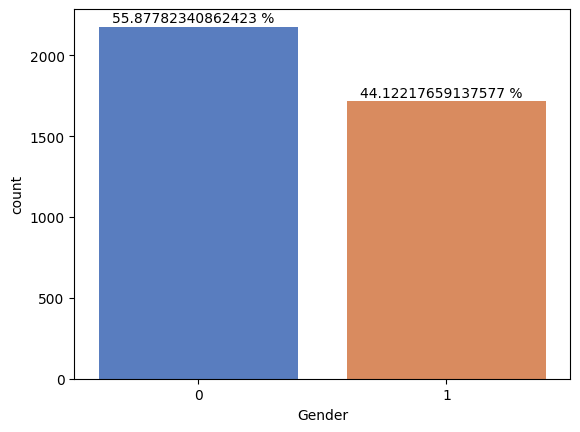

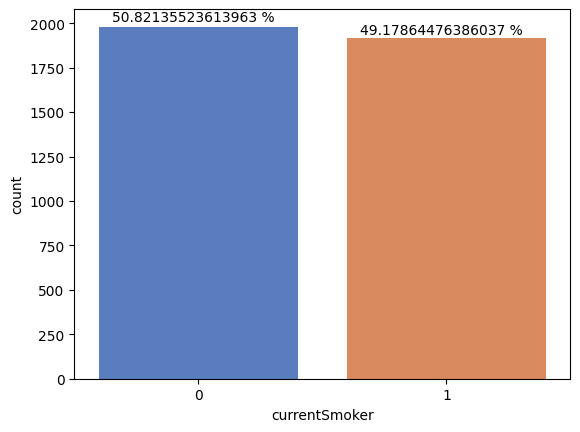

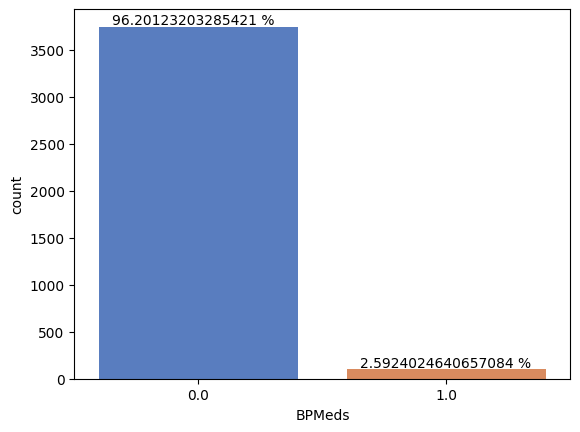

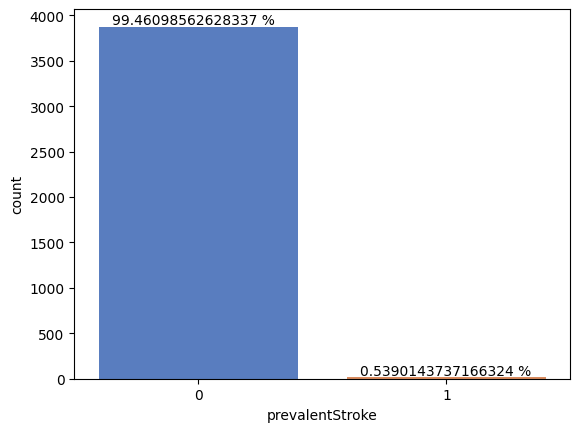

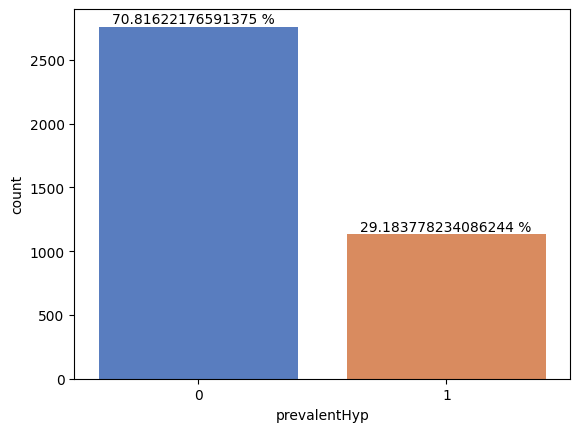

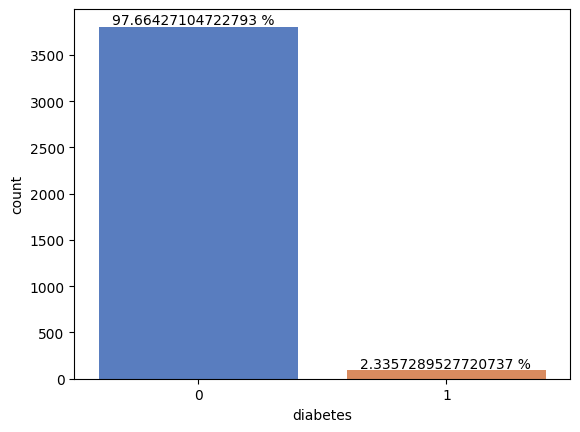

In [19]:
# loop for plot the countplot of all the categorical variables
for col in df_CHD_cat:
    sns.countplot(x = df_CHD_cat[col], data=df_CHD, palette='muted')

    #print the values in the graph
    plt.text(x = -0.35, y = df_CHD[col].value_counts()[0] + 30, s = str((df_CHD_cat[col].value_counts()[0])*100/len(df_CHD_cat[col])) + ' %')
    plt.text(x = 0.65, y = df_CHD[col].value_counts()[1] + 20, s = str((df_CHD_cat[col].value_counts()[1])*100/len(df_CHD_cat[col])) + ' %')

    plt.show()

*We can see from the above countplots that the variable 'BPMeds', 'prevalentStroke' and 'diabetes' are highly imbalanced.*

In [20]:
#dropped the highly imbalanced features
df_CHD = df_CHD.drop(['BPMeds', 'prevalentStroke', 'diabetes'], axis=1)


### *Distribution of Categorical Dependent Variables*

In [21]:
df_CHD['TenYearCHD'].value_counts()

0    3326
1     570
Name: TenYearCHD, dtype: int64

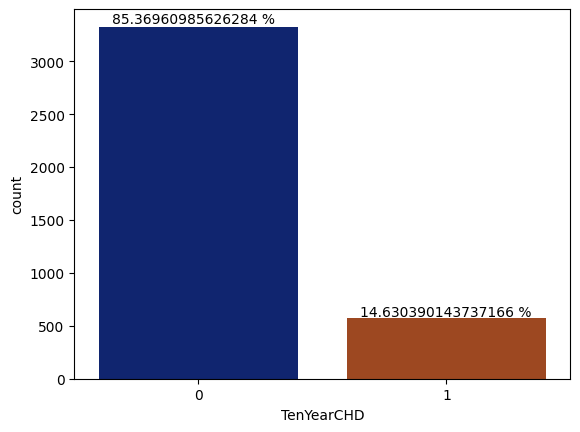

In [22]:
sns.countplot(x = df_CHD['TenYearCHD'], palette='dark')

plt.text(x = -0.35, y = df_CHD['TenYearCHD'].value_counts()[0] + 30, s = str((df_CHD['TenYearCHD'].value_counts()[0])*100/len(df_CHD['TenYearCHD'])) + ' %')
plt.text(x = 0.65, y = df_CHD['TenYearCHD'].value_counts()[1] + 20, s = str((df_CHD['TenYearCHD'].value_counts()[1])*100/len(df_CHD['TenYearCHD'])) + ' %')

plt.show()

*From above plot, we can see that data is imbalanced*

### *Missing Value Handling*

In [23]:
df_CHD.shape

(3896, 12)

In [24]:
# sort the variables on the basis of total null values in the variable
df_CHD.isnull().sum().sort_values(ascending=False)

glucose          317
Gender             0
age                0
currentSmoker      0
cigsPerDay         0
prevalentHyp       0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

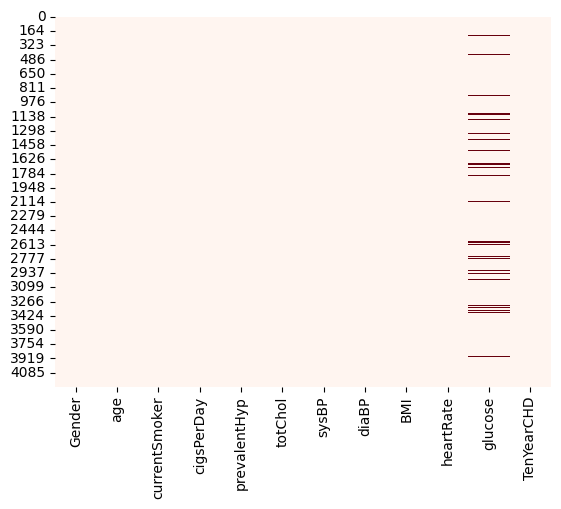

In [25]:
# plot heatmap to check null values
sns.heatmap(df_CHD.isnull(), cbar=False, cmap="Reds")

plt.show()

In [26]:
#dropped all the null values using dropna()
df_CHD.dropna(inplace=True)

In [27]:
df_CHD.isnull().sum()

Gender           0
age              0
currentSmoker    0
cigsPerDay       0
prevalentHyp     0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

In [28]:
df_CHD.shape

(3579, 12)

In [29]:
df_CHD['TenYearCHD'].value_counts()

0    3044
1     535
Name: TenYearCHD, dtype: int64

In [30]:
# Splitting features variable and the target variable

# all features
X = df_CHD.drop(['TenYearCHD'], axis = 1)

# the target variable
y = df_CHD.iloc[:, df_CHD.columns == 'TenYearCHD']

### *Encoding the Categorical Variables*

In [31]:
# OneHot Encoding to create dummy variables on categorical columns.

X = pd.get_dummies(X, drop_first = True)
X.head(2)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender_1,currentSmoker_1,prevalentHyp_1
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,1,0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0


### *Correlation*

In [32]:
df_Corr = X.corr()
df_Corr

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender_1,currentSmoker_1,prevalentHyp_1
age,1.000000,-0.191187,0.276647,0.389140,0.206026,0.133861,-0.020730,0.113537,-0.013615,-0.208351,0.306781
cigsPerDay,-0.191187,1.000000,-0.036034,-0.093465,-0.061958,-0.090965,0.076615,-0.059846,0.322352,0.785024,-0.069043
totChol,0.276647,-0.036034,1.000000,0.210748,0.180178,0.145190,0.084828,0.046375,-0.059078,-0.064087,0.155226
sysBP,0.389140,-0.093465,0.210748,1.000000,0.786609,0.273636,0.151473,0.113591,-0.022773,-0.132577,0.698476
diaBP,0.206026,-0.061958,0.180178,0.786609,1.000000,0.333172,0.158335,0.036717,0.072176,-0.115138,0.614269
BMI,0.133861,-0.090965,0.145190,0.273636,0.333172,1.000000,0.047152,0.063160,0.139239,-0.171008,0.261531
heartRate,-0.020730,0.076615,0.084828,0.151473,0.158335,0.047152,1.000000,0.088040,-0.108918,0.060041,0.112682
glucose,0.113537,-0.059846,0.046375,0.113591,0.036717,0.063160,0.088040,1.000000,0.005274,-0.058177,0.074242
Gender_1,-0.013615,0.322352,-0.059078,-0.022773,0.072176,0.139239,-0.108918,0.005274,1.000000,0.202553,0.018900
currentSmoker_1,-0.208351,0.785024,-0.064087,-0.132577,-0.115138,-0.171008,0.060041,-0.058177,0.202553,1.000000,-0.100350


<AxesSubplot: >

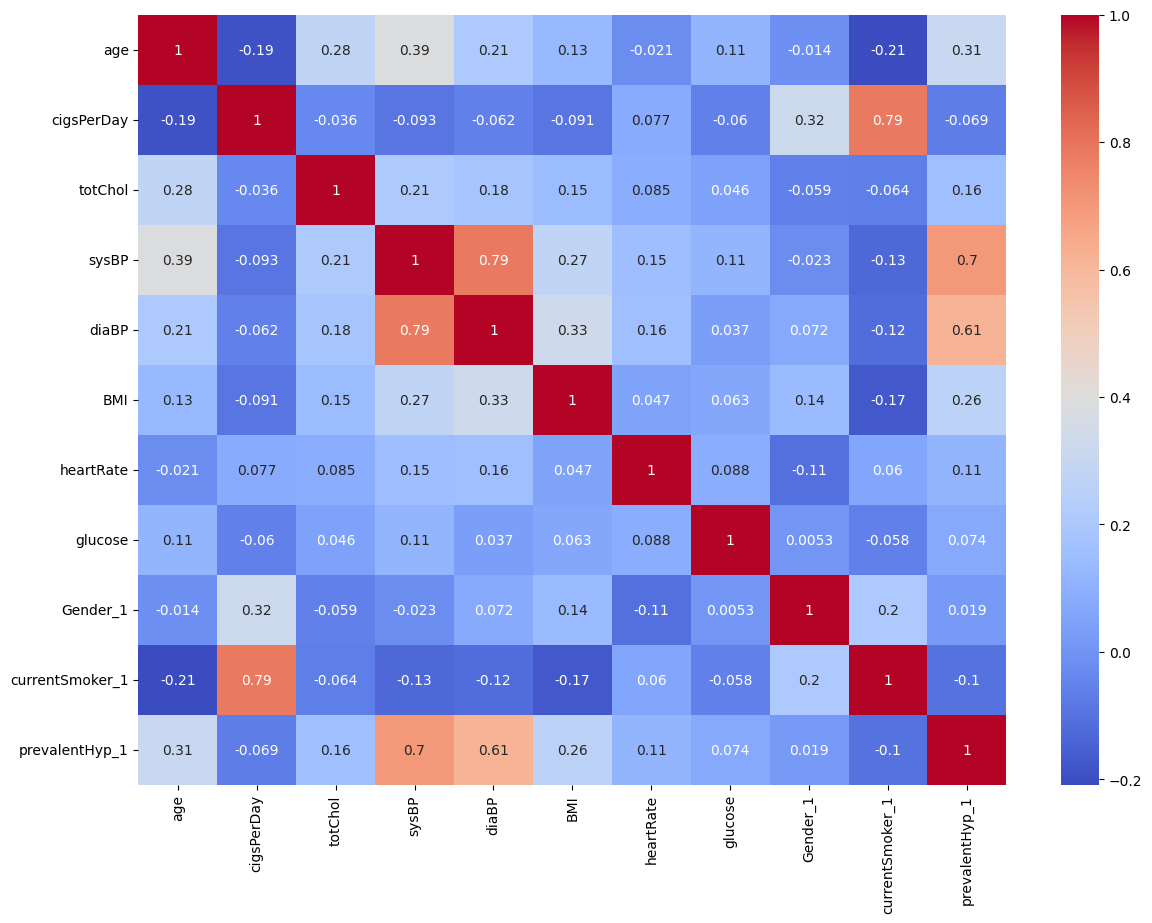

In [33]:
plt.figure(figsize=(14,10))

sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

In [34]:
# dropped 'currentSmoker' as it has high correlation with 'cigsPerDay'
# dropped 'diaBP' as it has high correlation with 'sysBP'
X = X.drop(['currentSmoker_1', 'diaBP'], axis=1)


### *Feature Scaling*

In [35]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
X = scaler.fit_transform(X)

In [36]:
X.shape


(3579, 9)

### *Splitting the Dataset*

In [37]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


print("The shape of X_train is:",X_train.shape)

print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)

print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (2863, 9)
The shape of X_test is: (716, 9)
The shape of y_train is: (2863, 1)
The shape of y_test is: (716, 1)


### *Handling Imbalance Data*

In [38]:
# Handling the imbalance data only on train dataset
# RandomUnderSampler will randomly select samples from the majority class
undersampler = RandomUnderSampler(random_state=10)
X_re, y_re = undersampler.fit_resample(X_train, y_train)


# **Logistic Regression Models** 

### *Support Vector Classifier*

In [40]:
# define SVC model
svclassifier = SVC()

# define hyperparameters to tune
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# define grid search object
grid_search = GridSearchCV(estimator=svclassifier, param_grid=parameters, cv=5)

# fit the grid search object to the data
grid_search.fit(X_re, y_re)

# print the best hyperparameters and corresponding accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy score:  0.6843481252149983


In [39]:
# build the model
svclassifier = SVC(kernel = 'linear', C=0.1, gamma='scale', class_weight= 'balanced')

# fit the model
svclassifier.fit(X_re, y_re)

SVC(C=0.1, class_weight='balanced', kernel='linear')

In [40]:
y_pred_SVM = svclassifier.predict(X_test)

<AxesSubplot: >

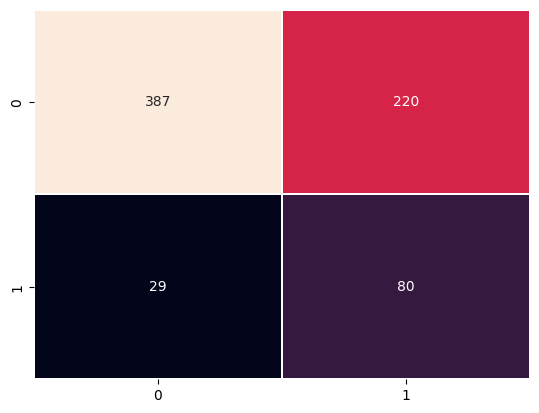

In [41]:
#confusion matrix
sns.heatmap((confusion_matrix(y_test, y_pred_SVM)), annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':10})

In [42]:
Report_svc = classification_report(y_test,y_pred_SVM)
print(Report_svc)

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       607
           1       0.27      0.73      0.39       109

    accuracy                           0.65       716
   macro avg       0.60      0.69      0.57       716
weighted avg       0.83      0.65      0.70       716



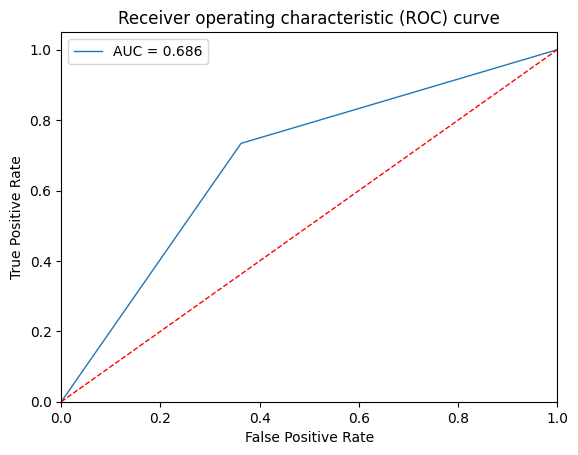

In [43]:
# y_test is the true and y_pred_SVM is the predicted values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_SVM)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='AUC = %0.3f' % roc_auc_score(y_test, y_pred_SVM))
plt.plot([0, 1], [0, 1], '--', color='red', lw=1,)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()

### *XG Boosting*

In [46]:
# Define XGBoost model with default hyperparameters
XG = XGBClassifier()

# Define the hyperparameter grid to search over
params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 300, 400, 500],
    'max_depth': [3, 5, 7, 11],
    'scale_pos_weight' : [1.0, 2.0, 3.0]
}


# Define the GridSearchCV object with the specified hyperparameters
grid_search = GridSearchCV(estimator=XG, param_grid=params, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_re, y_re)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1.0}
Best Accuracy: 0.6960093896713615


In [44]:
XG = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth = 3, random_state=10, scale_pos_weight = 0.8)
# fit the model
XG.fit(X_re, y_re)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [45]:
y_pred_XG = XG.predict(X_test)


<AxesSubplot: >

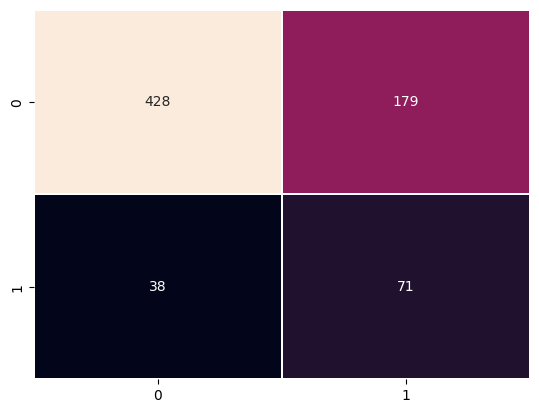

In [46]:
#confusion matrix
sns.heatmap((confusion_matrix(y_test, y_pred_XG)), annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':10})

In [47]:
Report_XG = classification_report(y_test,y_pred_XG)
print(Report_XG)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       607
           1       0.28      0.65      0.40       109

    accuracy                           0.70       716
   macro avg       0.60      0.68      0.60       716
weighted avg       0.82      0.70      0.74       716



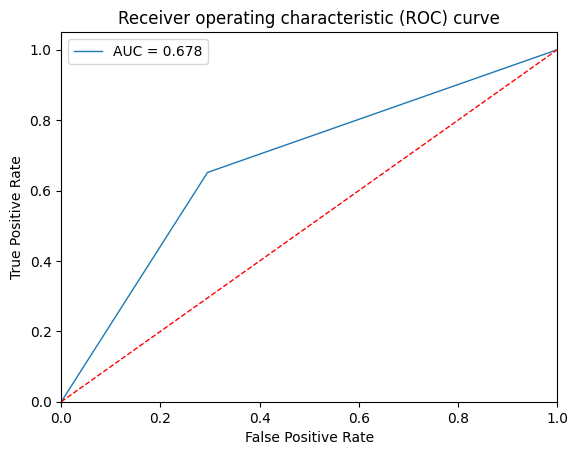

In [48]:
# y_test is the true and y_pred_XG is the predicted values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_XG)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='AUC = %0.3f' % round(roc_auc_score(y_test, y_pred_XG),3))
plt.plot([0, 1], [0, 1], '--', color='red', lw=1,)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()


### *K - Nearest Neighbours*

In [49]:
# Define KNN classifier
knn_classification = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn_classification, param_grid, cv=5)
grid_search.fit(X_re, y_re)

# Print best hyperparameters and corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best score: 0.6468317853457173


In [50]:
knn_classification = KNeighborsClassifier(n_neighbors = 5, p=1, weights='distance')
knn_classification.fit(X_re, y_re)

KNeighborsClassifier(p=1, weights='distance')

In [51]:
y_pred_KNN = knn_classification.predict(X_test)

<AxesSubplot: >

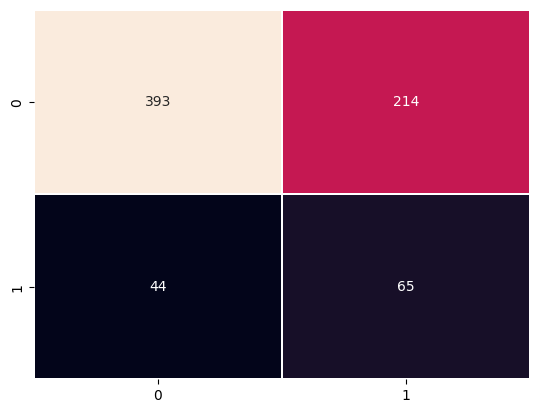

In [52]:
#confusion matrix
sns.heatmap((confusion_matrix(y_test, y_pred_KNN)), annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':10})

In [53]:
Report_knn = classification_report(y_test,y_pred_KNN)
print(Report_knn)

              precision    recall  f1-score   support

           0       0.90      0.65      0.75       607
           1       0.23      0.60      0.34       109

    accuracy                           0.64       716
   macro avg       0.57      0.62      0.54       716
weighted avg       0.80      0.64      0.69       716



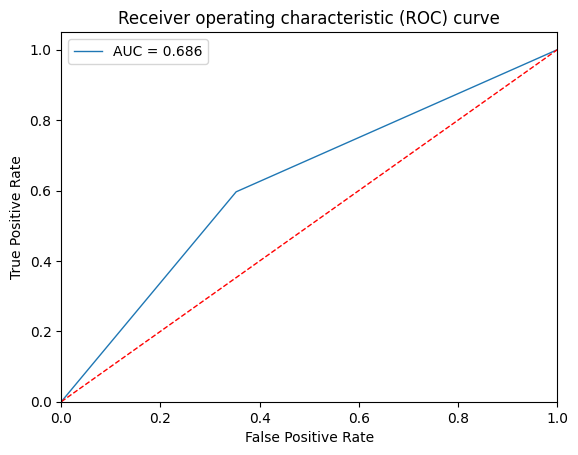

In [54]:
# y_test is the true and y_pred_KNN is the predicted values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_KNN)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='AUC = %0.3f' % roc_auc_score(y_test, y_pred_SVM))
plt.plot([0, 1], [0, 1], '--', color='red', lw=1,)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()

### *Decision Tree*

In [55]:
# Define the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4]}

# Perform grid search cross-validation
grid_search = GridSearchCV(decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_re, y_re)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [56]:
# instantiate the 'DecisionTreeClassifier'
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10, max_depth=5, min_samples_leaf=4, min_samples_split=4, class_weight='balanced')

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_re, y_re)

In [57]:
# predict the class labels using 'X_test'
y_pred_DT = decision_tree_model.predict(X_test)

<AxesSubplot: >

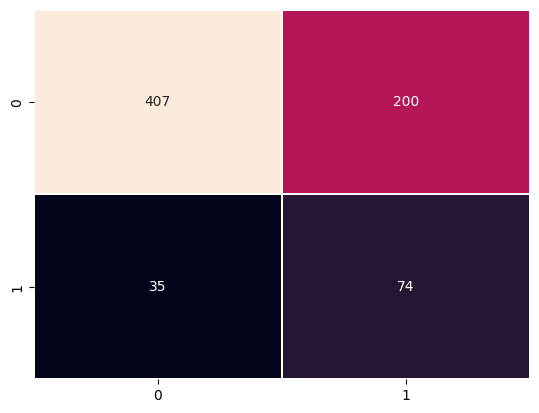

In [58]:
#confusion matrix
sns.heatmap((confusion_matrix(y_test, y_pred_DT)), annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':10})

In [59]:
Report_DT = classification_report(y_test,y_pred_DT)
print(Report_DT)

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       607
           1       0.27      0.68      0.39       109

    accuracy                           0.67       716
   macro avg       0.60      0.67      0.58       716
weighted avg       0.82      0.67      0.72       716



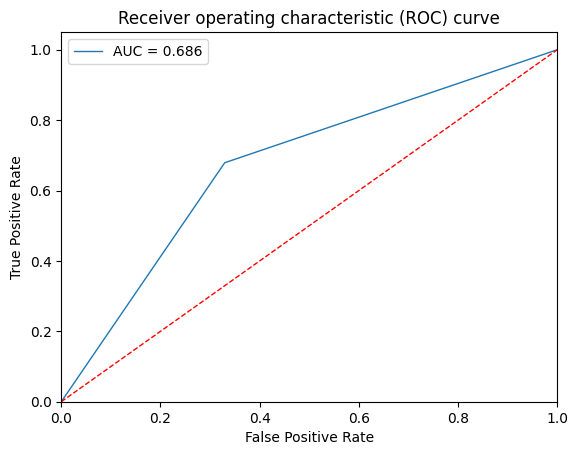

In [60]:
# y_test is the true and y_pred_DT is the predicted values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_DT)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='AUC = %0.3f' % roc_auc_score(y_test, y_pred_SVM))
plt.plot([0, 1], [0, 1], '--', color='red', lw=1,)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()

# **Conclusion**


<table align="left">
    <tr>
        <td width="8%">
            <img src="tick.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="Red">
                    <b>Analyzing the results and error metrics of all the above fitted models, we conclude that the XGBoosting has performed better than all other models.
 <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>
